In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
car_data = pd.read_excel('C:/Users/karan/Desktop/Projects/Datas/cars.xls')

In [3]:
car_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
car_data.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [7]:
car_data.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
car_data.duplicated().sum()

np.int64(0)

In [9]:
cat_col = car_data.select_dtypes(include = 'object').columns.tolist()
num_col = car_data.select_dtypes(include = np.number).columns.tolist()

Price


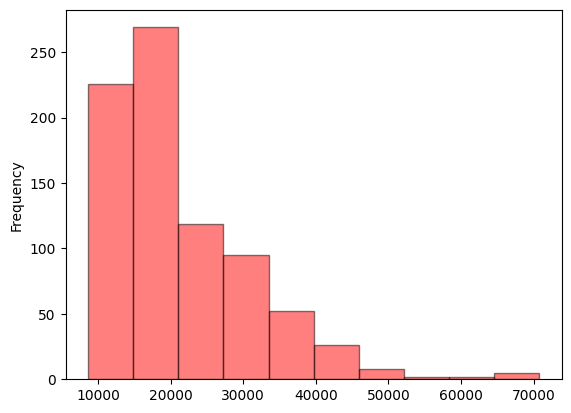

Mileage


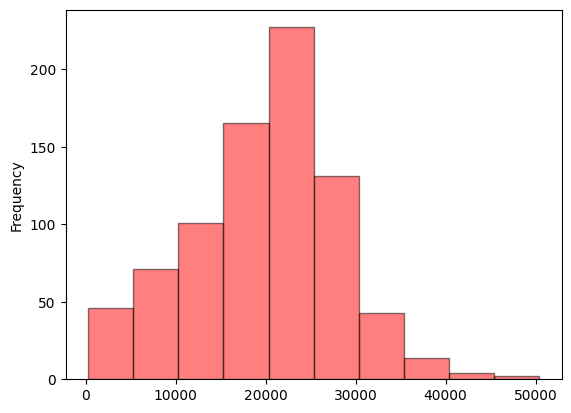

Cylinder


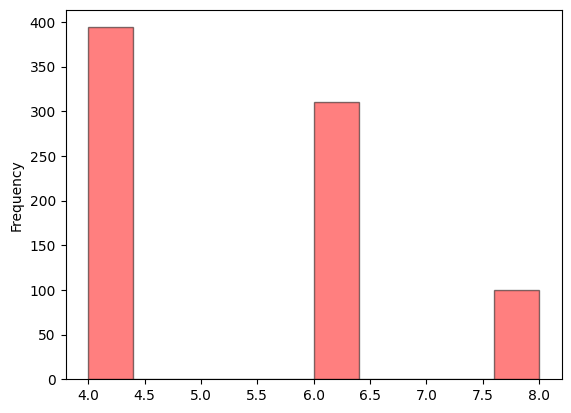

Liter


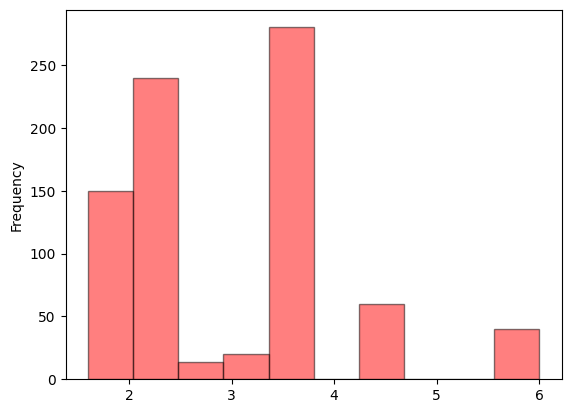

Doors


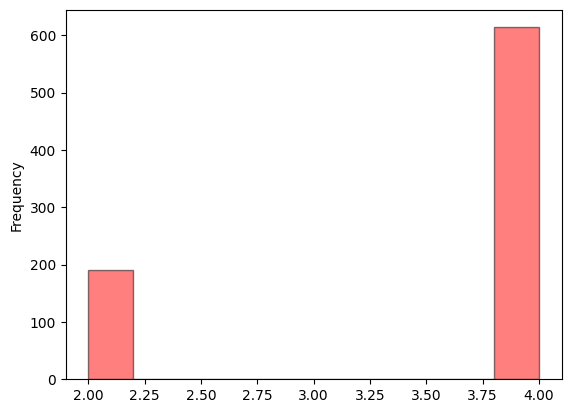

Cruise


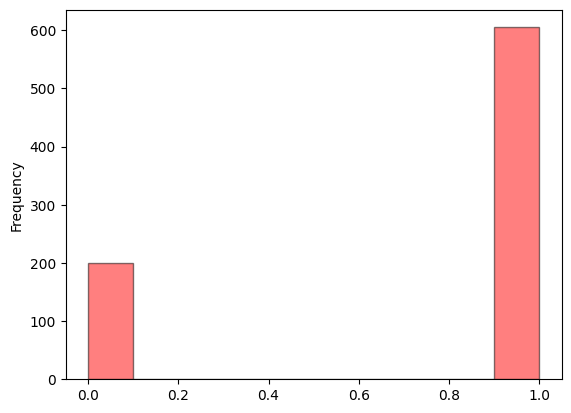

Sound


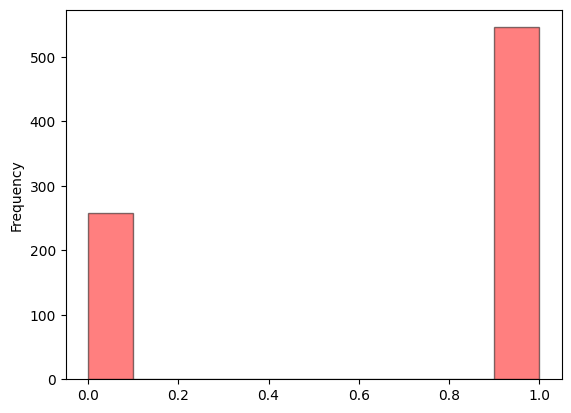

Leather


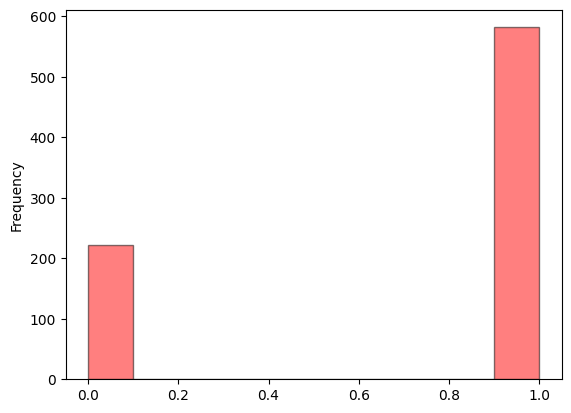

In [10]:
for col in num_col:
    print(col)
    plt.figure()
    plt.subplot(1,1,1)
    car_data[col].hist(bins = 10, alpha = 0.5, color = 'red', edgecolor = 'black', grid = False)
    plt.ylabel('Frequency')
    plt.show()

Make


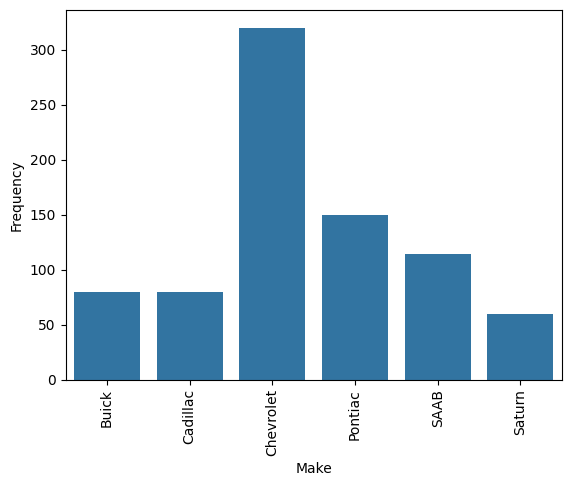

Model


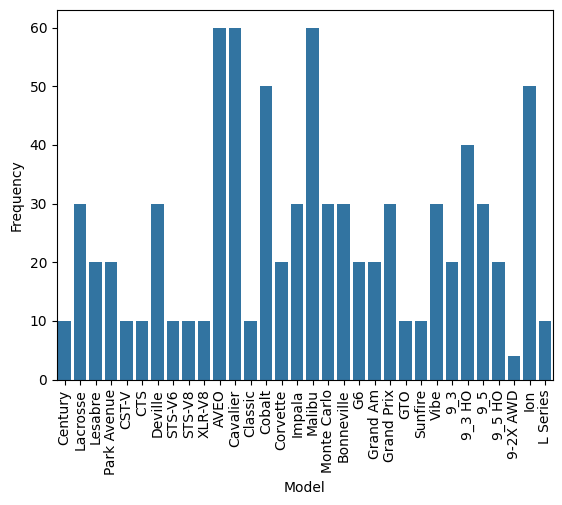

Trim


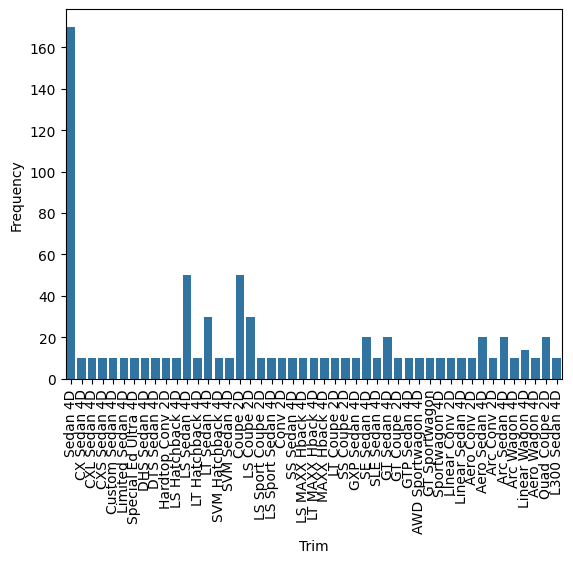

Type


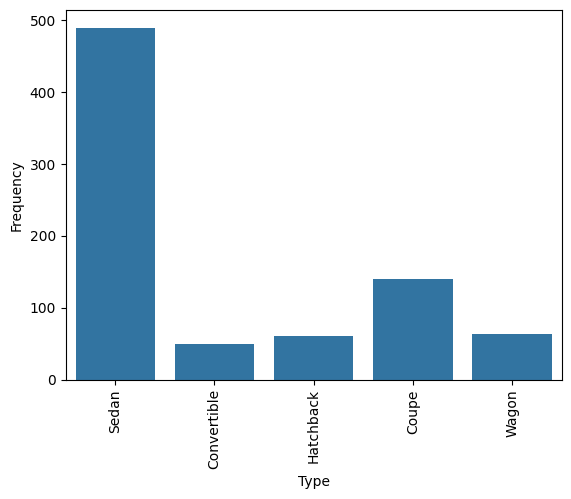

In [11]:
for col in cat_col:
    print(col)
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x = col, data = car_data)
    plt.ylabel('Frequency')
    plt.xticks(rotation = 90)
    plt.show()

In [12]:
corr = car_data[num_col].corr()

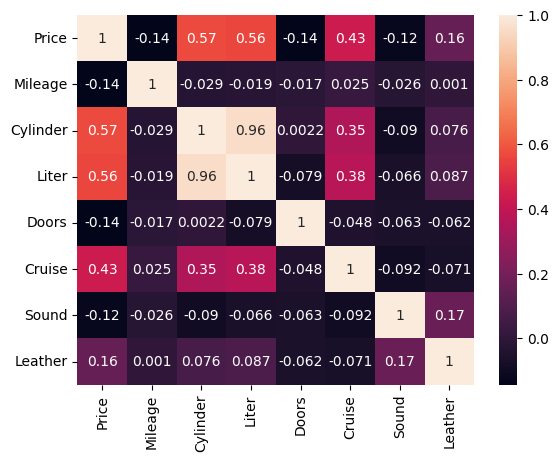

In [13]:
sns.heatmap(corr, annot = True)
plt.show()

In [14]:
Cylinder = car_data.groupby('Cylinder').agg({'Price': 'mean'}).reset_index().sort_values(by = 'Price', ascending = False)

C:\Users\karan\AppData\Local\Temp\ipykernel_4600\1920492330.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Cylinder', y = 'Price', data = Cylinder, palette = 'Set1')


Text(0.5, 1.0, 'Cylinder vs Price')

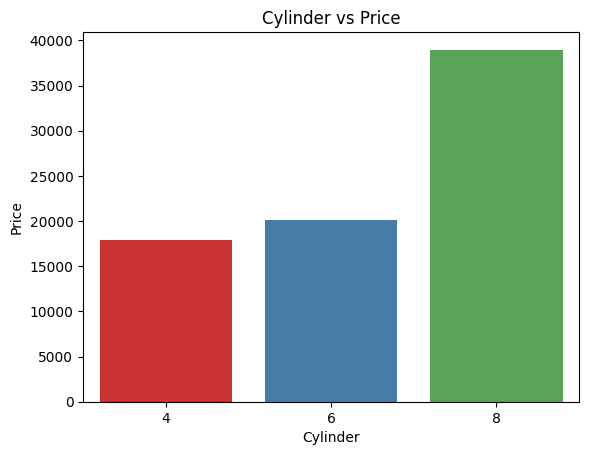

In [15]:
sns.barplot(x = 'Cylinder', y = 'Price', data = Cylinder, palette = 'Set1')
plt.title('Cylinder vs Price')

In [16]:
Liter = car_data.groupby('Liter').agg({'Price': 'mean'}).reset_index().sort_values(by = 'Price', ascending = False)

C:\Users\karan\AppData\Local\Temp\ipykernel_4600\2713597015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Liter', y = 'Price', data = Liter, palette = 'Set1')


Text(0.5, 1.0, 'Liter vs Price')

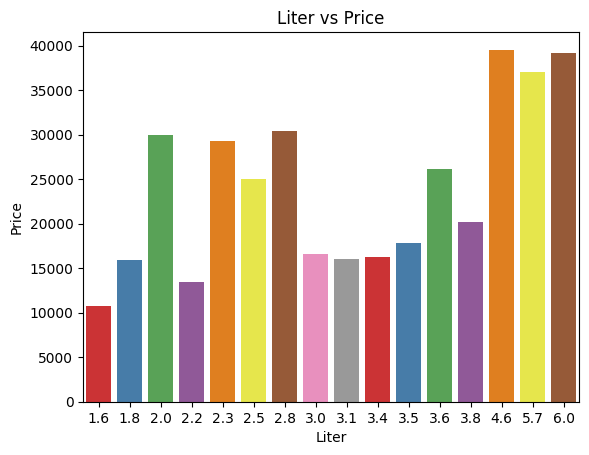

In [17]:
sns.barplot(x = 'Liter', y = 'Price', data = Liter, palette = 'Set1')
plt.title('Liter vs Price')

C:\Users\karan\AppData\Local\Temp\ipykernel_4600\2179113727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Doors', y = 'Price', data = Doors, palette = 'Set1')


Text(0.5, 1.0, 'Doors vs Price')

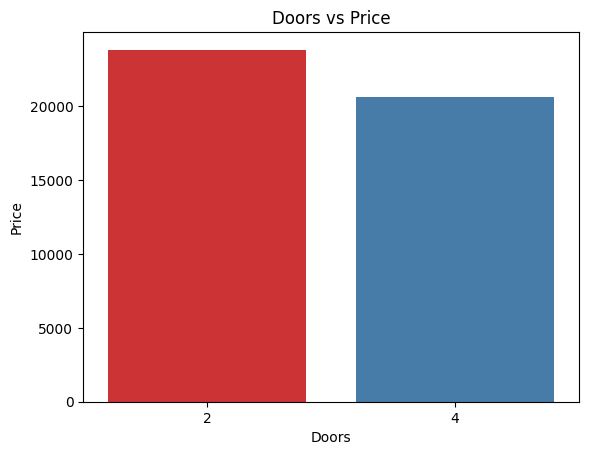

In [18]:
Doors = car_data.groupby('Doors').agg({'Price': 'mean'}).reset_index().sort_values(by = 'Price', ascending = False)
sns.barplot(x = 'Doors', y = 'Price', data = Doors, palette = 'Set1')
plt.title('Doors vs Price')

C:\Users\karan\AppData\Local\Temp\ipykernel_4600\2850790984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Doors', y = 'Mileage', data = Doors_mileage, palette = 'Set1')


Text(0.5, 1.0, 'Doors vs Mileage')

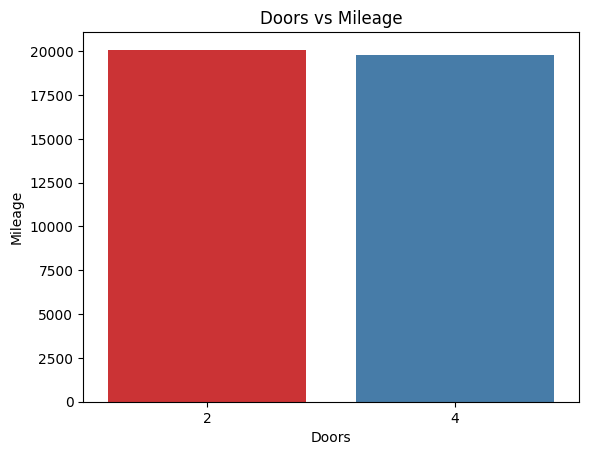

In [19]:
Doors_mileage = car_data.groupby('Doors').agg({'Mileage': 'mean'}).reset_index().sort_values(by = 'Mileage', ascending = False)
sns.barplot(x = 'Doors', y = 'Mileage', data = Doors_mileage, palette = 'Set1')
plt.title('Doors vs Mileage')

C:\Users\karan\AppData\Local\Temp\ipykernel_4600\721084904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Make', y = 'Price', data = Make, palette = 'Set1')


Text(0.5, 1.0, 'Make vs Price')

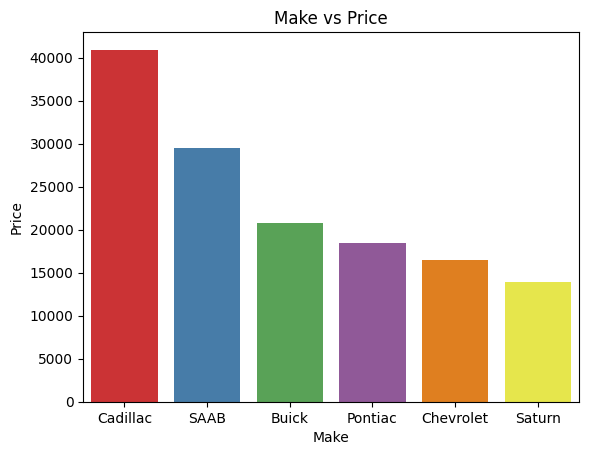

In [20]:
Make = car_data.groupby('Make').agg({'Price': 'mean'}).reset_index().sort_values(by = 'Price', ascending = False)
sns.barplot(x = 'Make', y = 'Price', data = Make, palette = 'Set1')
plt.title('Make vs Price')

C:\Users\karan\AppData\Local\Temp\ipykernel_4600\4168505430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Make', y = 'Mileage', data = Make_mileage, palette = 'Set1')


Text(0.5, 1.0, 'Make vs Mileage')

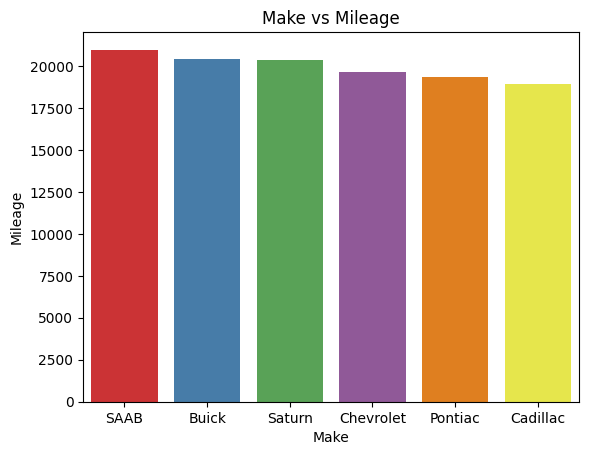

In [21]:
Make_mileage = car_data.groupby('Make').agg({'Mileage': 'mean'}).reset_index().sort_values(by = 'Mileage', ascending = False)
sns.barplot(x = 'Make', y = 'Mileage', data = Make_mileage, palette = 'Set1')
plt.title('Make vs Mileage')

C:\Users\karan\AppData\Local\Temp\ipykernel_4600\3975914291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Type', y = 'Price', data = Type, palette = 'Set1')


Text(0.5, 1.0, 'Type vs Price')

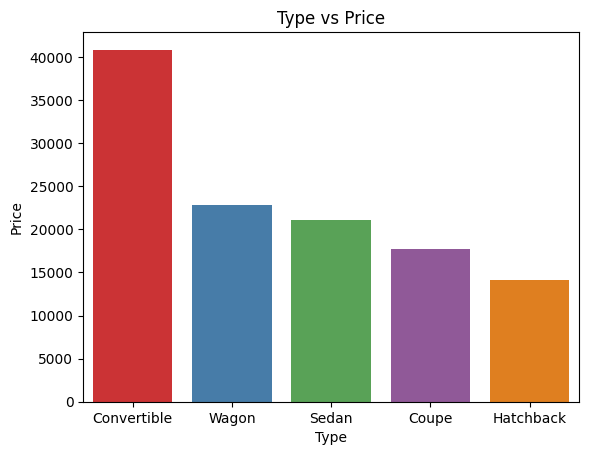

In [22]:
Type = car_data.groupby('Type').agg({'Price': 'mean'}).reset_index().sort_values(by = 'Price', ascending = False)
sns.barplot(x = 'Type', y = 'Price', data = Type, palette = 'Set1')
plt.title('Type vs Price')

In [23]:
x = car_data[['Mileage', 'Cylinder', 'Liter', 'Doors']]
y = car_data['Price']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [25]:
est = sm.OLS(y, X_scaled).fit()

In [26]:
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              13.57
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                    1.04e-10
Time:                        17:52:12   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     800   BIC:                                  1.844e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
r2 = r2_score(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 score: {r2}")
print(f"Mean Squared Error: {mse}")

R2 score: 0.3744875391961957
Mean Squared Error: 8309.294929353655


In [30]:
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients", coefficients)
print(f"Intercepts", intercept)

Coefficients [ -998.47478148  5586.37428565    19.70030488 -1345.8847193 ]
Intercepts 21175.055175627982


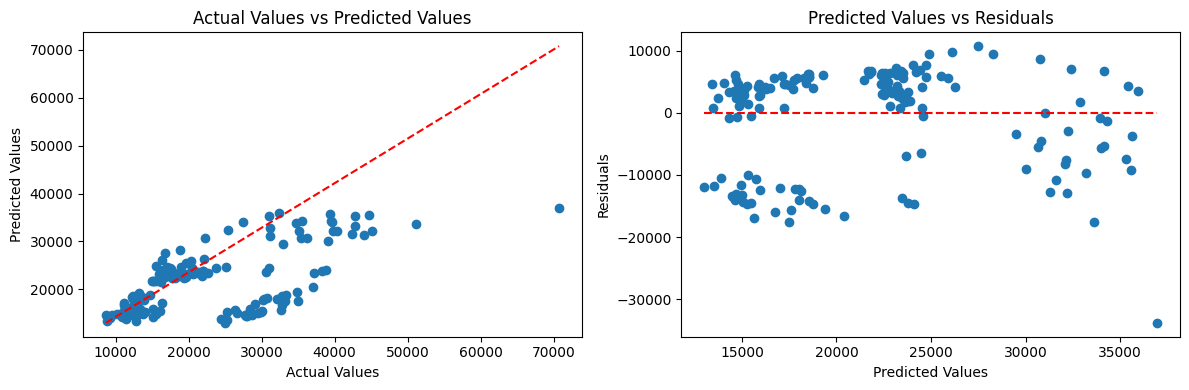

In [31]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')


plt.subplot(1,2,2)
residuals = y_pred-y_test
plt.scatter(y_pred, residuals)
plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), colors = 'r', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.tight_layout()
plt.show()

In [32]:
new = [[40000, 6, 4.1, 2]]
new_scaled = scaler.transform(new)

c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
y_pred_new = model.predict(new_scaled)

In [34]:
print((y_pred_new[0]))

24101.35679929257
